## Curso Monitoramento Dados Climáticos - ênfase na área de Oceanografia Física
#### Gerar mapas de temperatura e salinidade utilizando a linguagem de programação Python

##### Dados obtidos na plataforma ERAS5: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download

In [2]:
import xarray as xr #permite ler arquivo .nc NETCDFs
import matplotlib.pyplot as plt #plota o mapa
import cartopy #carto-cartografia; permite mexer nos eixos do mapa
import cartopy.crs as ccrs #permite mexer na projeção WGS84 
import numpy as np
import cartopy.feature as feature #adiciona ferramentas especifícas

In [3]:
abrindo_arquivo = xr.open_dataset('C:/Users/Sylvia/OneDrive/Documentos/Cursos/Curso_Analise_de_dados_2022/dados_climatico.nc')
print(abrindo_arquivo)

<xarray.Dataset> Size: 126MB
Dimensions:    (longitude: 89, latitude: 61, time: 728)
Coordinates:
  * longitude  (longitude) float32 356B -52.42 -52.17 -51.92 ... -30.67 -30.42
  * latitude   (latitude) float32 244B -18.92 -19.17 -19.42 ... -33.67 -33.92
  * time       (time) datetime64[ns] 6kB 2020-01-01 ... 2020-03-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float64 32MB ...
    t2m        (time, latitude, longitude) float64 32MB ...
    sp         (time, latitude, longitude) float64 32MB ...
    tp         (time, latitude, longitude) float64 32MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-16 21:13:38 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


In [4]:
#Abrir as variáveis - Tempo
time = abrindo_arquivo.variables['time'][:] #Os : garante que leia tudo 
print(time)
#O arquivo tem intervalo de 6h em 6h

<xarray.IndexVariable 'time' (time: 728)> Size: 6kB
array(['2020-01-01T00:00:00.000000000', '2020-01-01T03:00:00.000000000',
       '2020-01-01T06:00:00.000000000', ..., '2020-03-31T15:00:00.000000000',
       '2020-03-31T18:00:00.000000000', '2020-03-31T21:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  time


In [5]:
#Abrir a variável - Temperatura
temperatura = abrindo_arquivo.variables['t2m'][:]-273.15
print(temperatura)

<xarray.Variable (time: 728, latitude: 61, longitude: 89)> Size: 32MB
array([[[23.2460106 , 24.20193933, 25.17450142, ..., 25.81733169,
         25.78797871, 25.74835219],
        [24.18481676, 24.81199211, 25.75079827, ..., 25.7248698 ,
         25.60403337, 25.55462252],
        [25.12802587, 25.70236585, 26.14608507, ..., 25.62262359,
         25.51108226, 25.50521167],
        ...,
        [23.09435354, 23.10413787, 23.17605267, ..., 21.85516855,
         21.86935582, 21.95594711],
        [23.05472702, 23.01607892, 23.09826727, ..., 21.6531222 ,
         21.63502119, 21.70008697],
        [22.95003472, 22.97253867, 23.13789379, ..., 21.41731992,
         21.40606795, 21.37329045]],

       [[22.48968214, 22.98330143, 23.20736251, ..., 25.58152941,
         25.65050892, 25.63632164],
        [23.31058716, 23.39277551, 23.52192862, ..., 25.51401756,
         25.59327061, 25.59327061],
        [23.69119747, 23.66184449, 23.59824637, ..., 25.47194495,
         25.54532741, 25.57565882

In [6]:
#Ler long
lon = abrindo_arquivo.variables['longitude'][:]
print(lon)

<xarray.IndexVariable 'longitude' (longitude: 89)> Size: 356B
array([-52.42, -52.17, -51.92, -51.67, -51.42, -51.17, -50.92, -50.67, -50.42,
       -50.17, -49.92, -49.67, -49.42, -49.17, -48.92, -48.67, -48.42, -48.17,
       -47.92, -47.67, -47.42, -47.17, -46.92, -46.67, -46.42, -46.17, -45.92,
       -45.67, -45.42, -45.17, -44.92, -44.67, -44.42, -44.17, -43.92, -43.67,
       -43.42, -43.17, -42.92, -42.67, -42.42, -42.17, -41.92, -41.67, -41.42,
       -41.17, -40.92, -40.67, -40.42, -40.17, -39.92, -39.67, -39.42, -39.17,
       -38.92, -38.67, -38.42, -38.17, -37.92, -37.67, -37.42, -37.17, -36.92,
       -36.67, -36.42, -36.17, -35.92, -35.67, -35.42, -35.17, -34.92, -34.67,
       -34.42, -34.17, -33.92, -33.67, -33.42, -33.17, -32.92, -32.67, -32.42,
       -32.17, -31.92, -31.67, -31.42, -31.17, -30.92, -30.67, -30.42],
      dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude


In [7]:
#Ler lat
lat = abrindo_arquivo.variables['latitude'][:]
print(lat)

<xarray.IndexVariable 'latitude' (latitude: 61)> Size: 244B
array([-18.92, -19.17, -19.42, -19.67, -19.92, -20.17, -20.42, -20.67, -20.92,
       -21.17, -21.42, -21.67, -21.92, -22.17, -22.42, -22.67, -22.92, -23.17,
       -23.42, -23.67, -23.92, -24.17, -24.42, -24.67, -24.92, -25.17, -25.42,
       -25.67, -25.92, -26.17, -26.42, -26.67, -26.92, -27.17, -27.42, -27.67,
       -27.92, -28.17, -28.42, -28.67, -28.92, -29.17, -29.42, -29.67, -29.92,
       -30.17, -30.42, -30.67, -30.92, -31.17, -31.42, -31.67, -31.92, -32.17,
       -32.42, -32.67, -32.92, -33.17, -33.42, -33.67, -33.92], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude


In [24]:
#Caso necessite filtrar um numero especifico, podemos usar mascara
#Função para criar uma mascara em um determinado valor

#temperatura = np.ma.masked_where(temperatura < 5, temperatura) 
#print(temperatura)

In [8]:
minimo_temperatura = temperatura.data.min()
print(minimo_temperatura)

6.506005859375023


In [9]:
maximo_temperatura = temperatura.data.max()
print(maximo_temperatura)

38.56582031250002


In [10]:
desviopadrao_temperatura = temperatura.data.std()
print(desviopadrao_temperatura)

2.775191895221974


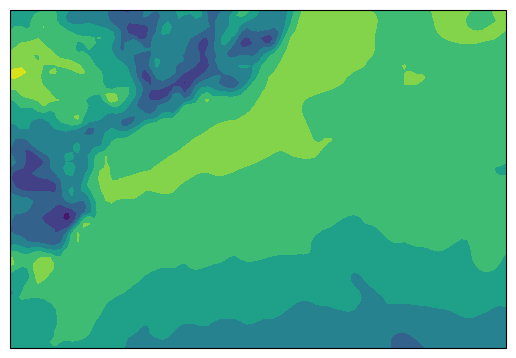

In [11]:
#Plotar os dados
#plt.plot = serve para quando temos duas variáveis
#plt.contourf(no minimo usa 3 variáveis dentro)

plt.figure()
plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon,lat,temperatura[1])

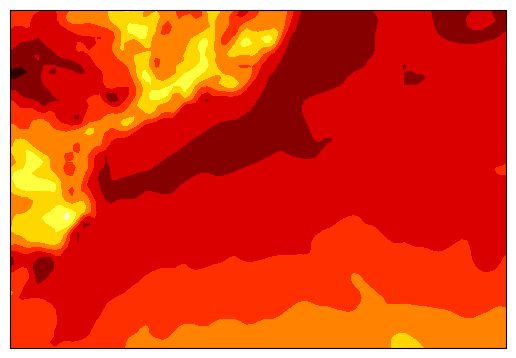

In [12]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree()) #permite o mapa ficar proporcional
plt.contourf(lon,lat,temperatura[1], cmap='hot_r')

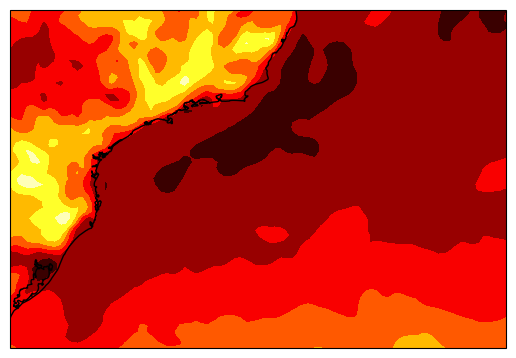

In [13]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree()) #permite o mapa ficar proporcional
ax.add_feature(cartopy.feature.COASTLINE)
plt.contourf(lon,lat,temperatura[2], cmap='hot_r')

In [14]:
#Plota todos os estados
states_provinces = feature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

In [15]:
#Linspace = pega um espaço e coloca o que você quer
#30 = intevalo entre os valores de minimo 6 e maximo 38
#Isso vai permitir a suavização da cor do mapa

cores = np.linspace(6,38,30) #(min,max,quanto quer que varie no espaço)
print(cores)

[ 6.          7.10344828  8.20689655  9.31034483 10.4137931  11.51724138
 12.62068966 13.72413793 14.82758621 15.93103448 17.03448276 18.13793103
 19.24137931 20.34482759 21.44827586 22.55172414 23.65517241 24.75862069
 25.86206897 26.96551724 28.06896552 29.17241379 30.27586207 31.37931034
 32.48275862 33.5862069  34.68965517 35.79310345 36.89655172 38.        ]


Text(0.5, 1.0, 'Mapa de Temperatura Regional - ERA5 - Mes/Ano')

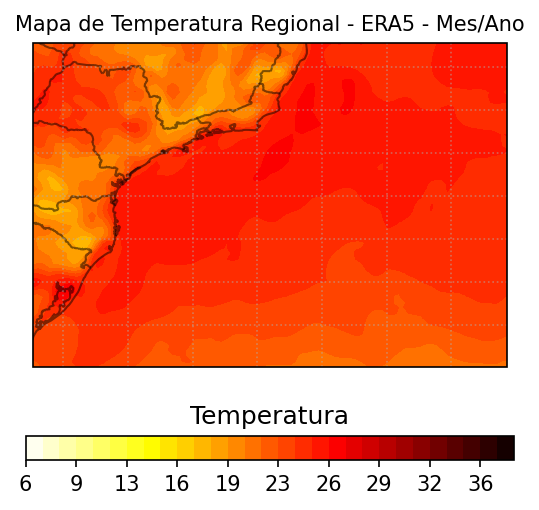

In [21]:
plt.figure(figsize=(6,4), dpi=150) 
#figsize - tamanho da figura (largura, altura)
#dpi - resolução da figura, imagem mais nítida

ax = plt.axes(projection=ccrs.PlateCarree()) #permite o mapa ficar proporcional
ax.add_feature(cartopy.feature.COASTLINE, alpha=0.5) #alpha clareia e escurece as linhas
ax.add_feature(states_provinces, alpha=0.5) #fronteiras de estados

plt.contourf(lon,lat,temperatura[2], cmap='hot_r', levels=cores)

gl = ax.gridlines(alpha=0.5, linestyle=':') #adiciona a grade no mapa
gl.xlabels_top = False #Remove os rótulos do eixo X na parte superior
gl.xlabels_bottom = True #Mantém os rótulos do eixo X na parte inferior
gl.ylabels_left = True #Mantém os rótulos do eixo Y na esquerda

cb = plt.colorbar(orientation='horizontal', shrink=0.7, format='%.0f') 
#Gera a barra de cores
#Exibe os valores da barra de cor sem casas decimais

cb.ax.set_title('Temperatura')
plt.title('Mapa de Temperatura Regional - ERA5 - Mes/Ano', fontsize=10)